In [1]:
import subprocess
import sys

# List of packages to install
packages = [
    "h3", "python-geohash", "geopy", "seaborn", "geopandas"
]

# Function to install a package
def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Try to import packages, install if not found
try:
    import h3
    import geohash
    import pandas as pd
    import geopy.geocoders
    import geopandas as gpd
    from shapely import wkt
    import matplotlib.pyplot as plt
    from shapely.geometry import LineString, Polygon
except ImportError as e:
    missing_package = str(e).split("'")[1]
    print(f"Package {missing_package} not found. Installing...")
    if missing_package == "h3":
        install_package("h3==4.0.0")  # replace with the pre-release version if necessary
    else:
        install_package(missing_package)
    # Try importing again
    import h3
    import geohash
    import pandas as pd
    import geopy.geocoders
    import geopandas as gpd
    from shapely import wkt
    import matplotlib.pyplot as plt
    from shapely.geometry import LineString, Polygon

print("All packages are successfully imported!")


All packages are successfully imported!


country_codes = ['MX', 'IN', 'ID', 'CO']   
colors = ['#5c6c84', '#83a0b2', '#afc8bb', '#d9ccbc']  


# dl

In [2]:
df = pd.read_csv(f'/home/jovyan/Data/20191201_CO_dl.csv')
df

,event_timestamp,cuebiq_id,device_type_code,os_name,lat,lng,accuracy_meters,device_manufacturer_name,device_model_code,carrier_code,...,floor_num,altitude_meters,event_zoned_datetime,classification_type,transformation_type,os_version,processing_date,country_code,provider_id,event_date_utc
0,1575165219,2802347259,GAID,ANDROID,7.067016,-73.174464,40.24,samsung,SM-J700M,732101.0,...,NaN,0.000000,2019-11-30T20:53:39-05:00,OTHER,KEEP,23,20191201,CO,700199,2019-11-30
1,1575166124,2802347259,GAID,ANDROID,7.067086,-73.174584,31.80,samsung,SM-J700M,732101.0,...,NaN,0.000000,2019-11-30T21:08:44-05:00,OTHER,KEEP,23,20191201,CO,700199,2019-11-30
2,1575124023,2802347259,GAID,ANDROID,7.067096,-73.174488,23.39,samsung,SM-J700M,732101.0,...,NaN,0.000000,2019-11-30T09:27:03-05:00,OTHER,KEEP,23,20191201,CO,700199,2019-11-30
3,1575161028,2802347259,GAID,ANDROID,7.067100,-73.174480,24.47,samsung,SM-J700M,732101.0,...,NaN,0.000000,2019-11-30T19:43:48-05:00,OTHER,KEEP,23,20191201,CO,700199,2019-11-30
4,1575163685,2802347259,GAID,ANDROID,7.067100,-73.174480,24.47,samsung,SM-J700M,732101.0,...,NaN,0.000000,2019-11-30T19:43:48-05:00,OTHER,KEEP,23,20191201,CO,700199,2019-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544984,1575166408,1851430078,IDFA,IOS,0.000000,-74.002899,10.00,apple,iPhone 6,310120.0,...,NaN,3.086788,2019-11-30T21:13:28-05:00,OTHER,KEEP,12.4.3,20191201,CO,700199,2019-11-30
1544985,1575147012,2278783500,IDFA,IOS,0.000000,-71.046234,5.00,apple,iPhone 6 Plus,311480.0,...,NaN,43.202679,2019-11-30T15:50:12-05:00,OTHER,KEEP,12.4.3,20191201,CO,700199,2019-11-30
1544986,1575147012,2278783500,IDFA,IOS,0.000000,-71.046234,5.00,apple,iPhone 6 Plus,311480.0,...,NaN,43.202679,2019-11-30T15:50:12-05:00,OTHER,KEEP,12.4.3,20191201,CO,700199,2019-11-30
1544987,1575208623,2407774359,IDFA,IOS,0.000000,-73.959930,5.00,apple,iPhone 6 Plus,310260.0,...,NaN,24.214413,2019-12-01T08:57:03-05:00,OTHER,KEEP,12.4.3,20191201,CO,700199,2019-12-01


## Convert the points to H3 hexagons

In [3]:
resolution = 7
df['h3_index'] = df.apply(lambda row: h3.latlng_to_cell(row['lat'], row['lng'], resolution), axis=1)
df

,event_timestamp,cuebiq_id,device_type_code,os_name,lat,lng,accuracy_meters,device_manufacturer_name,device_model_code,carrier_code,...,altitude_meters,event_zoned_datetime,classification_type,transformation_type,os_version,processing_date,country_code,provider_id,event_date_utc,h3_index
0,1575165219,2802347259,GAID,ANDROID,7.067016,-73.174464,40.24,samsung,SM-J700M,732101.0,...,0.000000,2019-11-30T20:53:39-05:00,OTHER,KEEP,23,20191201,CO,700199,2019-11-30,876608d61ffffff
1,1575166124,2802347259,GAID,ANDROID,7.067086,-73.174584,31.80,samsung,SM-J700M,732101.0,...,0.000000,2019-11-30T21:08:44-05:00,OTHER,KEEP,23,20191201,CO,700199,2019-11-30,876608d61ffffff
2,1575124023,2802347259,GAID,ANDROID,7.067096,-73.174488,23.39,samsung,SM-J700M,732101.0,...,0.000000,2019-11-30T09:27:03-05:00,OTHER,KEEP,23,20191201,CO,700199,2019-11-30,876608d61ffffff
3,1575161028,2802347259,GAID,ANDROID,7.067100,-73.174480,24.47,samsung,SM-J700M,732101.0,...,0.000000,2019-11-30T19:43:48-05:00,OTHER,KEEP,23,20191201,CO,700199,2019-11-30,876608d61ffffff
4,1575163685,2802347259,GAID,ANDROID,7.067100,-73.174480,24.47,samsung,SM-J700M,732101.0,...,0.000000,2019-11-30T19:43:48-05:00,OTHER,KEEP,23,20191201,CO,700199,2019-11-30,876608d61ffffff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544984,1575166408,1851430078,IDFA,IOS,0.000000,-74.002899,10.00,apple,iPhone 6,310120.0,...,3.086788,2019-11-30T21:13:28-05:00,OTHER,KEEP,12.4.3,20191201,CO,700199,2019-11-30,8766cc473ffffff
1544985,1575147012,2278783500,IDFA,IOS,0.000000,-71.046234,5.00,apple,iPhone 6 Plus,311480.0,...,43.202679,2019-11-30T15:50:12-05:00,OTHER,KEEP,12.4.3,20191201,CO,700199,2019-11-30,878a4b844ffffff
1544986,1575147012,2278783500,IDFA,IOS,0.000000,-71.046234,5.00,apple,iPhone 6 Plus,311480.0,...,43.202679,2019-11-30T15:50:12-05:00,OTHER,KEEP,12.4.3,20191201,CO,700199,2019-11-30,878a4b844ffffff
1544987,1575208623,2407774359,IDFA,IOS,0.000000,-73.959930,5.00,apple,iPhone 6 Plus,310260.0,...,24.214413,2019-12-01T08:57:03-05:00,OTHER,KEEP,12.4.3,20191201,CO,700199,2019-12-01,8766cc462ffffff


In [4]:
# Group by H3 index to get the number of points and unique users
h3_agg = df.groupby('h3_index').agg(
    points_count=('cuebiq_id', 'count'),
    users_count=('cuebiq_id', 'nunique')
).reset_index()
h3_agg

,h3_index,points_count,users_count
0,8766002cdffffff,82,2
1,8766002d4ffffff,22,2
2,8766002ebffffff,13,1
3,8766002f0ffffff,58,5
4,8766002f1ffffff,100,5
...,...,...,...
11273,878a4bcacffffff,23,18
11274,878a4bcaeffffff,12,6
11275,878a4bcb1ffffff,12,11
11276,878a4bcb3ffffff,38,24


## Histogram

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [6]:
# Check the maximum and minimum values for points_count
max_points = h3_agg['points_count'].max()
min_points = h3_agg['points_count'].min()

# Check the maximum and minimum values for users_count
max_users = h3_agg['users_count'].max()
min_users = h3_agg['users_count'].min()

print(f"Max Points Count: {max_points}, Min Points Count: {min_points}")
print(f"Max Users Count: {max_users}, Min Users Count: {min_users}")

Max Points Count: 12795, Min Points Count: 1
Max Users Count: 1316, Min Users Count: 1


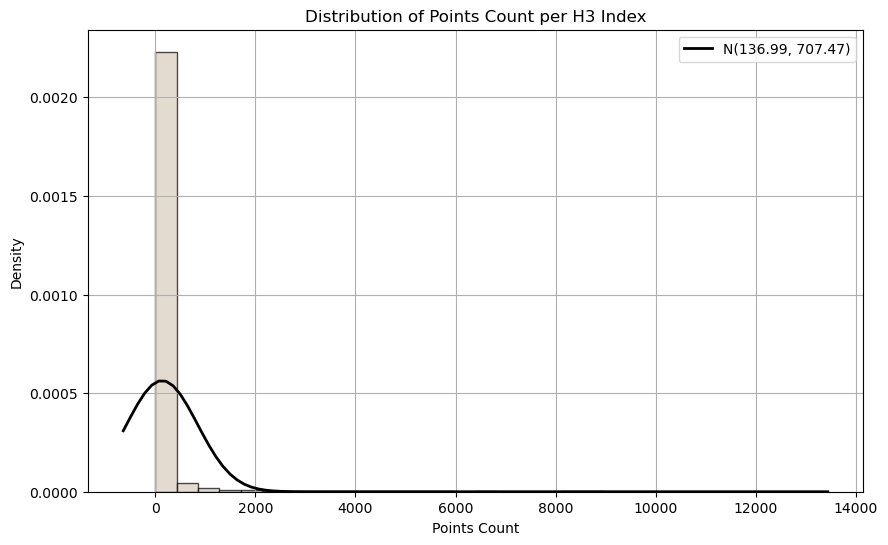

In [8]:
# Plot histogram for points_count
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(h3_agg['points_count'], bins=30, density=True, color='#d9ccbc', edgecolor='black', alpha=0.7)

# Fit a normal distribution to the data
mu, std = norm.fit(h3_agg['points_count'])

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'N({mu:.2f}, {std:.2f})')

plt.title('Distribution of Points Count per H3 Index')
plt.xlabel('Points Count')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

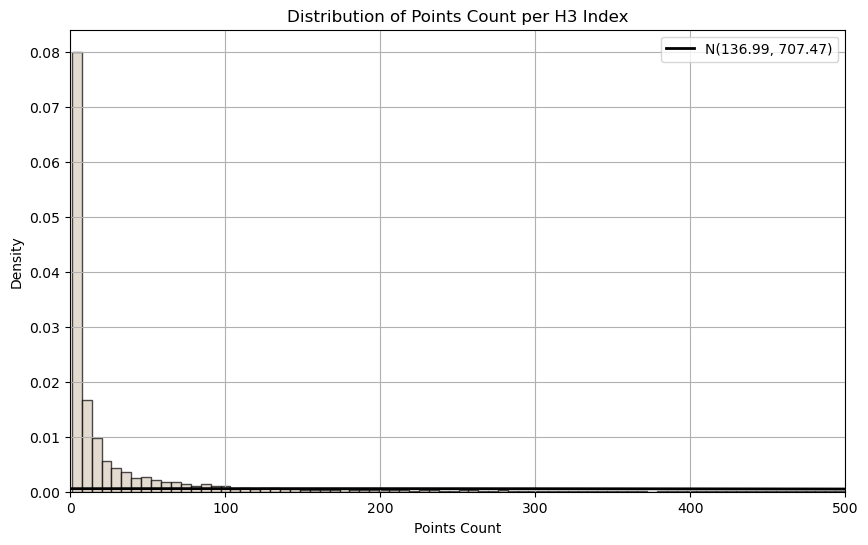

In [18]:
# zoom in to  histogram Plot of points_count
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(h3_agg['points_count'], bins= 2000, density=True, color='#d9ccbc', edgecolor='black', alpha=0.7)

# Fit a normal distribution to the data
mu, std = norm.fit(h3_agg['points_count'])

# Plot the PDF
xmin, xmax = 0, 500  # Set the x-axis limits to zoom in
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'N({mu:.2f}, {std:.2f})')

# Set x-axis limits
plt.xlim(xmin, xmax)

plt.title('Distribution of Points Count per H3 Index')
plt.xlabel('Points Count')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


# Tj

In [ ]:
# Parse the WKT strings into geometries
df['geometry'] = df['trajectory_wkt'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(ax=ax, color='blue')

# Customize the plot
plt.title('Trajectory Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()